In [91]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
plt.style.use('ggplot')
plt.rc('font',family = 'malgun gothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def tanh(x):
    return np.tanh(x)

### 인공 신경망에서 초기 가중치 설정에 따른 출력값의 변화와 학습 양상

* 초기 가중치가 평균이 0이고 표준편차가 큰(1) 정규분포에서 추출한 경우 출력값들의 변화

In [186]:
input_data = np.random.randn(1000,100) # 임의의 데이터 1000 * 100 행렬 생성 
node_num = 100 # 각 뉴런의 노드 갯수 
hidden_layer = 5

activation = {}
weights_1 = {}
input_dict = {}
x = input_data

for i in range(hidden_layer):
    
    if i != 0:
        x = activation[i-1] # 2 번째 hidden layer 부턴 전 activation 의 출력값을 input 으로 가져라 
        
    W = np.random.randn(node_num,node_num) * 1 # 100 * 100 행렬의 가중치 행렬 생성 
                                                # 표준편차는 0.01
    
    input_ = np.dot(x,W) # 가중합으로 해당 activation 에 입력
    
    
    weights_1[i] = W.flatten()
    input_dict[i] = input_
    activation[i] = sigmoid(input_) # 활성화 함수로 감싸 다음 activaition 으로 출력

Text(0.5, 0.98, '활성화 함수가 sigmoid 면서 가중치가 표준편차가 큰 정규 분포에서 뽑게 되었을 때 출력값들의 변화')

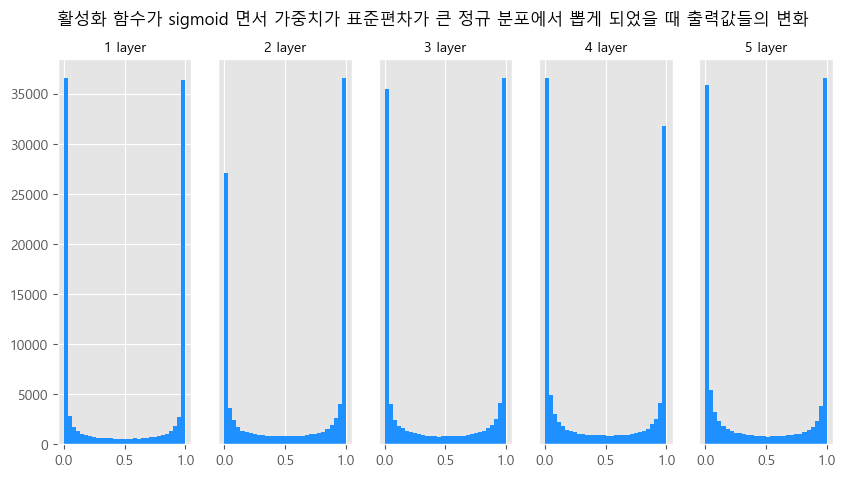

In [187]:
fig, ax = plt.subplots(ncols = len(activation),
                        figsize = (10,5))


ax = ax.flatten()

for i,var in activation.items():
    
    ax[i].hist(var.flatten(), bins = 30,color = 'dodgerblue')
    
    if i != 0:
        ax[i].set_yticks([])
        
    ax[i].set_title(f'{i + 1} layer', fontsize = 10)
    
fig.suptitle('활성화 함수가 sigmoid 면서 가중치가 표준편차가 큰 정규 분포에서 뽑게 되었을 때 출력값들의 변화') 

* 이러한 출력값을 가지는 이유는 다음과 같다.

Text(0.5, 1.0, 'sigmoid 활성화 함수를 씌운 후의 분포')

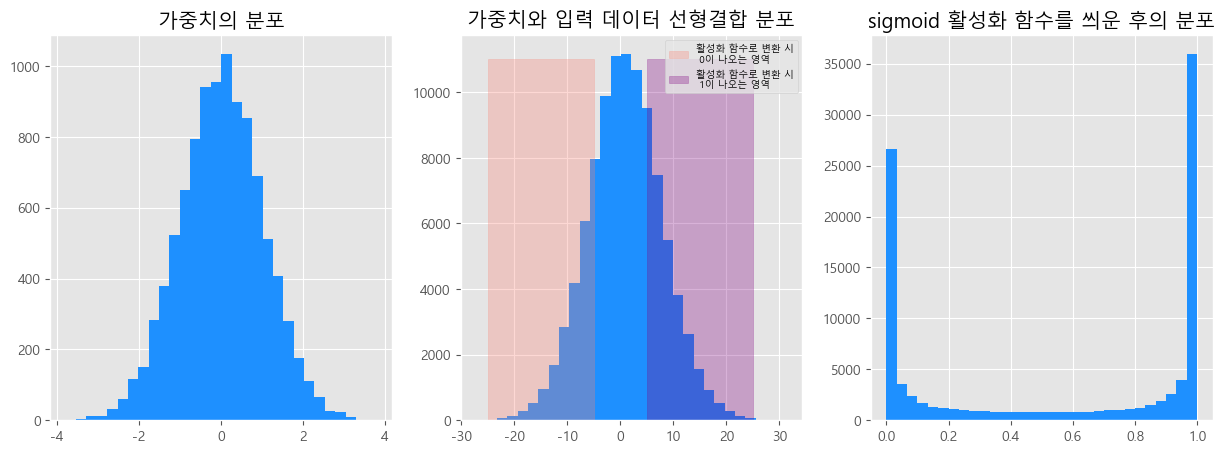

In [203]:
fig, ax = plt.subplots(ncols = 3, figsize =  (15,5))


ax[0].hist(weights_1[1].flatten(), bins = 30, color = 'dodgerblue')
ax[0].set_title('가중치의 분포')


ax[1].hist(input_dict[1].flatten(), bins = 30, color = 'dodgerblue')
ax[1].fill_between([-5,-25],[11000,11000], alpha = 0.3, color = 'salmon', 
                    label = '활성화 함수로 변환 시\n 0이 나오는 영역')
ax[1].fill_between([5,25],[11000,11000], alpha = 0.3, color = 'purple',
                    label = '활성화 함수로 변환 시\n 1이 나오는 영역')
ax[1].legend(fontsize = 7)
ax[1].set_title('가중치와 입력 데이터 선형결합 분포')


ax[2].hist(activation[1].flatten(), bins = 30, color = 'dodgerblue')
ax[2].set_title('sigmoid 활성화 함수를 씌운 후의 분포')

* 각 가중치의 값과 입력값의 선형결합되어 나오는 분포는 두 번째 그래프와 같이 큰 값을 갖는다. 그 이유는 가중치와 입력값이 아무리 작더라도 가중합으로 계산되기 때문이다.
* 시그모이드 함수는 입력값의 절댓값이 5 이상이라면 0이나 1에 수렴하는 값으로 출력한다.
* 그러기에 다음과 같은 출력값들이 나오게 된다.

Text(0.5, 1.0, '시그모이드 함수의 특성')

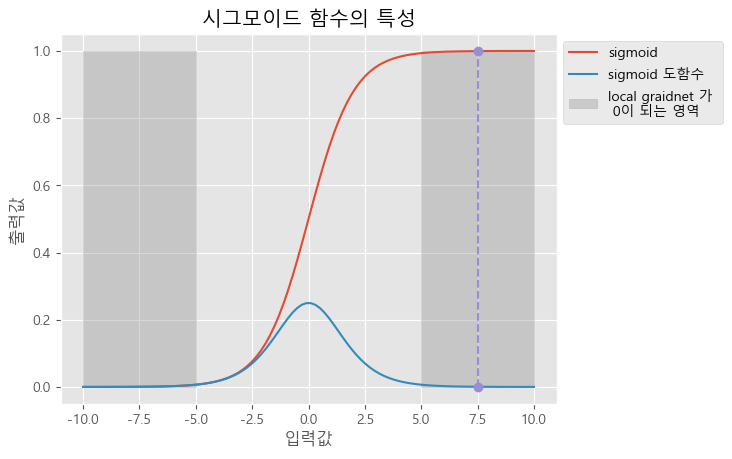

In [192]:
x = np.linspace(-10,10,100)

plt.plot(x,sigmoid(x), label = 'sigmoid')
plt.plot(x,sigmoid(x) * (1 - sigmoid(x)), label = 'sigmoid 도함수')
plt.fill_between([-10,-5],[1,1], alpha = 0.3, color = 'gray', label = 'local graidnet 가 \n 0이 되는 영역')
plt.fill_between([10,5],[1,1], alpha = 0.3, color = 'gray')

plt.plot([7.5,7.5],[0,1], ls = '--', marker = 'o')
plt.xlabel('입력값')
plt.ylabel('출력값')

plt.legend(bbox_to_anchor = (1,1))
plt.title('시그모이드 함수의 특성')

* 위에서 보았듯 활성화함수의 출력값이 0과 1에 가까운 값들이 많이 나온다는 것은 적합한 가중치 업데이트에 문제가 생기게 됨을 의미하며, 이는 global minimun까지 도달하는데 어려움이 있음을 의미한다.

그 이유는 각 node 에서 역전파 과정에 있어서 출력값이 0과 1에 가까울 수록 해당 local gradient 값이 0에 매우 가깝게 되어 학습이 매우 느릴 뿐 더러 그 이전 노드 까지 역전파가 도달하지 못해 적합한 업데이트가 일어나지 않을 수 있다.

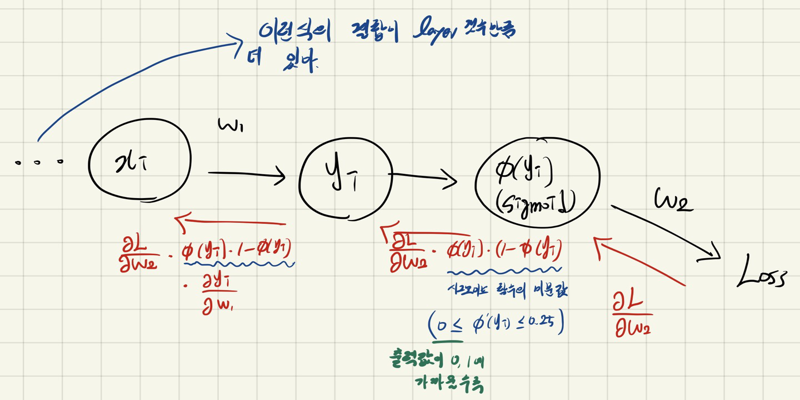

In [107]:
Image.open("C:/Users/whileduck/Desktop/역전파과정.jpg").resize((800,400))

* 이에 우리는 가중치를 초기화 할 때 사용하는 정규 분포의 분산이 너무 크면 안된다는 것을 알았다.
* 그렇다면 아주 작게 해보자 

* 초기 가중치가 평균이 0이고 표준편차가 매우 작은 (0.01) 정규 분포에서 랜덤 추출한 경우

In [208]:
input_data = np.random.randn(1000,100) # 임의의 데이터 1000 * 100 행렬 생성 
node_num = 100 # 각 뉴런의 노드 갯수 
hidden_layer = 5

activation = {}
weights_01 = {}
input_dict = {}
x = input_data

for i in range(hidden_layer):
    
    if i != 0:
        x = activation[i-1] # 2 번째 hidden layer 부턴 전 activation 의 출력값을 input 으로 가져라 
        
    W = np.random.randn(node_num,node_num) * 0.01 # 100 * 100 행렬의 가중치 행렬 생성 
                                                # 표준편차는 0.01
    
    input_ = np.dot(x,W) # 가중합으로 해당 activation 에 입력
    
    
    weights_01[i] = W.flatten()
    input_dict[i] = input_
    activation[i] = sigmoid(input_) # 활성화 함수로 감싸 다음 activaition 으로 출력

Text(0.5, 0.98, '활성화 함수가 sigmoid 면서 가중치가 표준편차가 0.01인 분포에서 뽑게 되었을 때 출력값들의 변화')

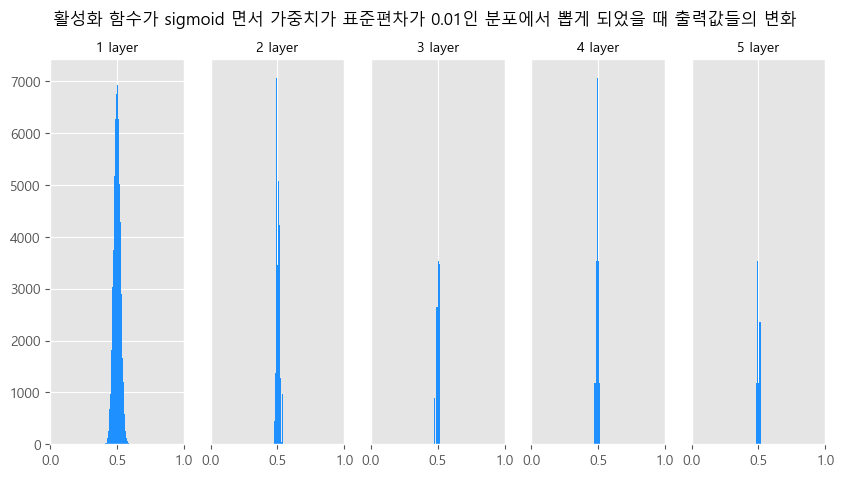

In [209]:
fig, ax = plt.subplots(ncols = len(activation),
                        figsize = (10,5))


ax = ax.flatten()

for i,var in activation.items():
    
    ax[i].hist(var.flatten(), bins = 50,color = 'dodgerblue')
    
    if i != 0:
        ax[i].set_yticks([])
    
    ax[i].set_xlim([0,1])    
    ax[i].set_title(f'{i + 1} layer', fontsize = 10)
    
fig.suptitle('활성화 함수가 sigmoid 면서 가중치가 표준편차가 0.01인 분포에서 뽑게 되었을 때 출력값들의 변화') 

### 표준편차가 0.01 인 곳에서 가져왔을 경우에는 대부분의 출력값들이 0.5 근처에 위치하고 있는 모습을 볼 수 있다.

##### 초기 가중치를 표준편차가 0.01 인 정규 분포에서 가중치를 랜덤하게 초기화 했다는 것은 가중치들의 값이 거의 유사하다는 것을 의미한다.

* 이는 node 의 갯수와 복잡성과 상관 없이 선형결합한 값들이 모두 유사한 값들이 나오며, 표현력이 제한된다는 것이다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'sigmoid 활성화 함수를 씌운 후의 분포')

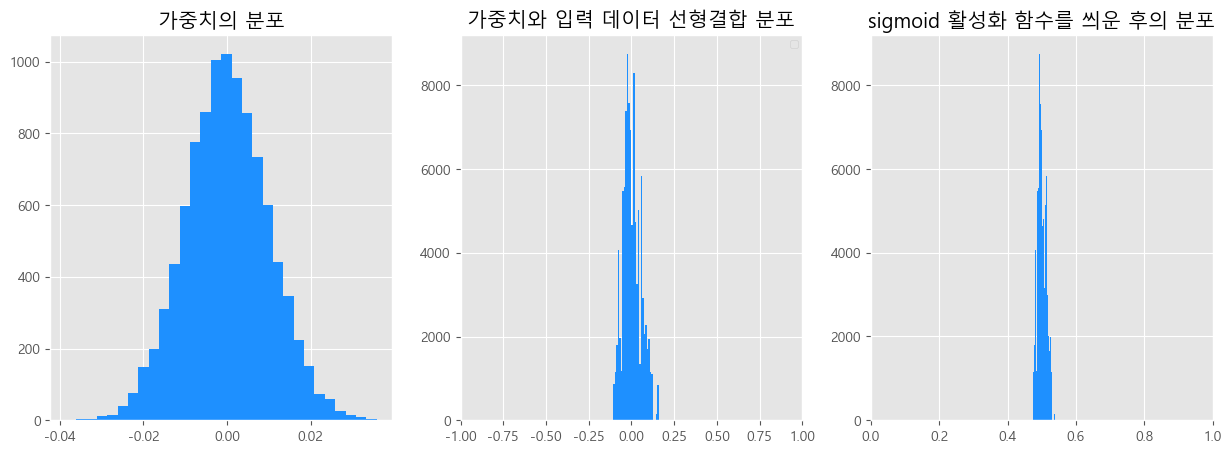

In [212]:
fig, ax = plt.subplots(ncols = 3, figsize =  (15,5))


ax[0].hist(weights_1[1].flatten(), bins = 30, color = 'dodgerblue')
ax[0].set_title('가중치의 분포')


ax[1].hist(input_dict[1].flatten(), bins = 30, color = 'dodgerblue')
ax[1].set_xlim([-1,1])
ax[1].set_title('가중치와 입력 데이터 선형결합 분포')


ax[2].hist(activation[1].flatten(), bins = 30, color = 'dodgerblue')
ax[2].set_xlim([0,1])
ax[2].set_title('sigmoid 활성화 함수를 씌운 후의 분포')

그 이유는 다음과 같다.

* 가중치의 값들이 평균이 0이고 표준편차가 0.01 인 분포에서 뽑아와 값들이 유사하다는 것은 대부분의 가중치의 값이 0에 가깝다는 것이다.
* 이는 입력값과 가중치가 선형결합하였을 때의 값이 0에 수렴한다는 뜻이고 이러한 값이 sigmoid 값에 들어가면 해당 노드의 출력값은 0.5 를 출력하게 된다.
* 이후 출력된 0.5 의 값이 또 가중치와 선형 결합하면 0, 그것이 sigmoid 변환을 하면 0.5를 출력하는 일이 반복되며 최종 아웃풋에서도 0.5 를 출력하게 된다.

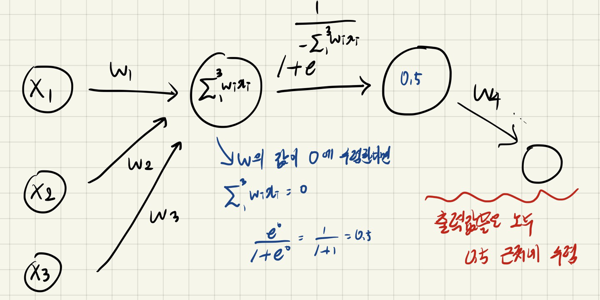

In [106]:
Image.open("C:/Users/whileduck/Desktop/가중치의 값이 0에 수렴할 경우 출력값들의 변화.jpg").resize((600,300))

# 현재까지의 내용을 정리하자면 다음과 같다.

* 가중치 초기화 시 분산이 큰 경우 (분산이 1)에는 출력값들이 0과 1에 많이 분포되어있어 역전파 과정에서 Gradient vanishing 문제나 늦은 학습 속도를 가질 수 있다.
* 가중치 초기화 시 분산이 작은 경우 (분산이 0.01)에는 출력값들이 모두 0.5에 분포되어 있어 출력값들의 다양성이 제한된다.
* 이는 신경망을 얼마나 복잡하게 만드느냐와 상관없이 신경망의 표현력을 제한하게 되어 성능이 떨어지게 된다.

# 그렇다면 적절한 가중치 초기화 기법은 무엇일까?

* 엄밀히 말하면 가중치를 랜덤하게 초기화 할 때 표준편차가 몇 인 분포에서 랜덤하게 추출해와야 할까?

### 1. Xavier 초기화 기법

    Xavier 초기화 기법은 기울기가 사라지거나 폭발하는 문제를 방지하기 위해 신경망 계층의 가중치를 초기화하는 방법입니다. 2010년 Xavier Glorot과 Yoshua Bengio에 의해 소개되었습니다.


    이 기술의 기본 아이디어는 분산이 레이어에 대한 입력 수와 레이어의 뉴런 수에 의해 제어되는 무작위 분포로 신경망 레이어의 가중치를 초기화하는 것입니다. 목표는 각 레이어의 출력 분산이 입력 분산과 거의 같도록 하여 그래디언트가 사라지거나 폭발하는 문제를 방지하는 것입니다.

In [216]:
input_data = np.random.randn(1000,100) # 임의의 데이터 1000 * 100 행렬 생성 
node_num = 100 # 각 뉴런의 노드 갯수 
hidden_layer = 5

activation = {}
weights_01 = {}
input_dict = {}
x = input_data

for i in range(hidden_layer):
    
    if i != 0:
        x = activation[i-1] # 2 번째 hidden layer 부턴 전 activation 의 출력값을 input 으로 가져라 
        
    W = np.random.randn(node_num,node_num) * np.sqrt(1/node_num) # 100 * 100 행렬의 가중치 행렬 생성 
                                                # 이전 layer 의 node 갯수의 역수를 분산으로 사용한다.
    
    input_ = np.dot(x,W) # 가중합으로 해당 activation 에 입력
    
    
    weights_01[i] = W.flatten()
    input_dict[i] = input_
    activation[i] = sigmoid(input_) # 활성화 함수로 감싸 다음 activaition 으로 출력

Text(0.5, 0.98, '활성화 함수가 sigmoid 면서 가중치를 Xavier 초기화 기법으로 초기화 하였을 때 출력값들의 변화')

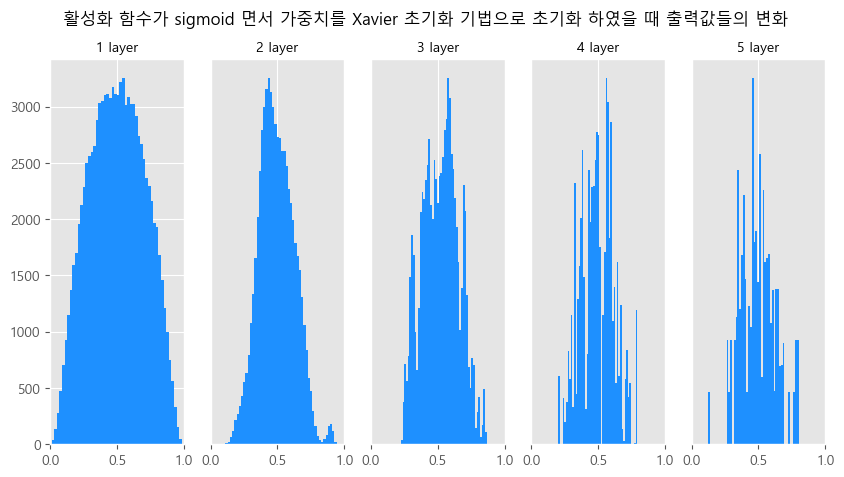

In [219]:
fig, ax = plt.subplots(ncols = len(activation),
                        figsize = (10,5))


ax = ax.flatten()

for i,var in activation.items():
    
    ax[i].hist(var.flatten(), bins = 50,color = 'dodgerblue')
    
    if i != 0:
        ax[i].set_yticks([])
    
    ax[i].set_xlim([0,1])    
    ax[i].set_title(f'{i + 1} layer', fontsize = 10)
    
fig.suptitle('활성화 함수가 sigmoid 면서 가중치를 Xavier 초기화 기법으로 초기화 하였을 때 출력값들의 변화') 

Text(0.5, 0.98, 'Xavier 초기화 기법')

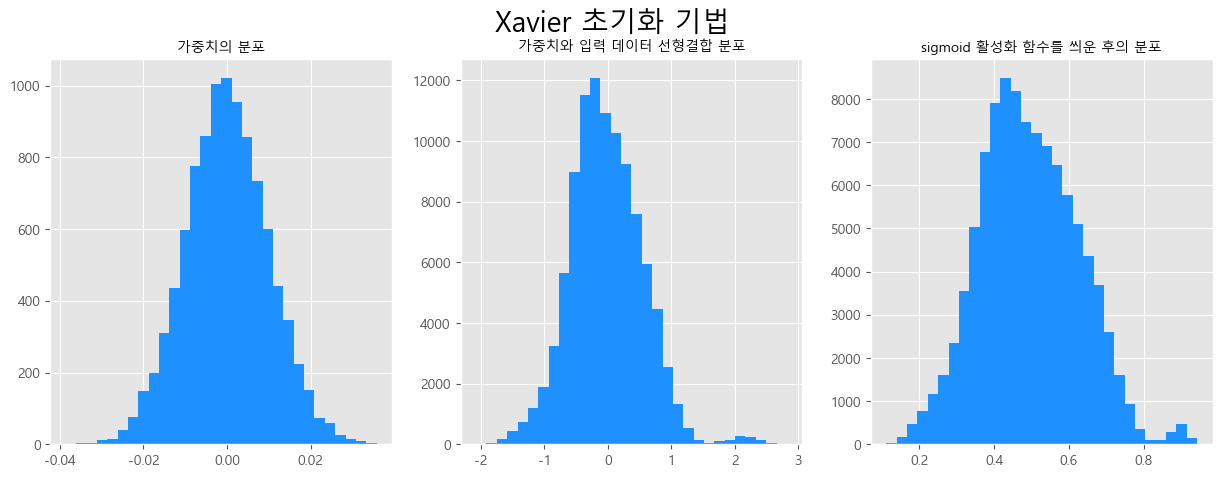

In [228]:
fig, ax = plt.subplots(ncols = 3, figsize =  (15,5))


ax[0].hist(weights_1[1].flatten(), bins = 30, color = 'dodgerblue')
ax[0].set_title('가중치의 분포', fontsize = 10)


ax[1].hist(input_dict[1].flatten(), bins = 30, color = 'dodgerblue')
ax[1].set_title('가중치와 입력 데이터 선형결합 분포', fontsize = 10)


ax[2].hist(activation[1].flatten(), bins = 30, color = 'dodgerblue')
ax[2].set_title('sigmoid 활성화 함수를 씌운 후의 분포', fontsize = 10)

fig.suptitle('Xavier 초기화 기법',fontsize = 20)

* Xavier 초기화 기법을 사용하게 되니 가중치와 입력 데이터의 선형결합의 절댓값이 5를 넘지 않으며 활성화 함수로 변환한 후에도 극단적인 값을 갖지 않는 모습을 볼 수 있다. 

Text(0.5, 1.0, '시그모이드 함수의 특성')

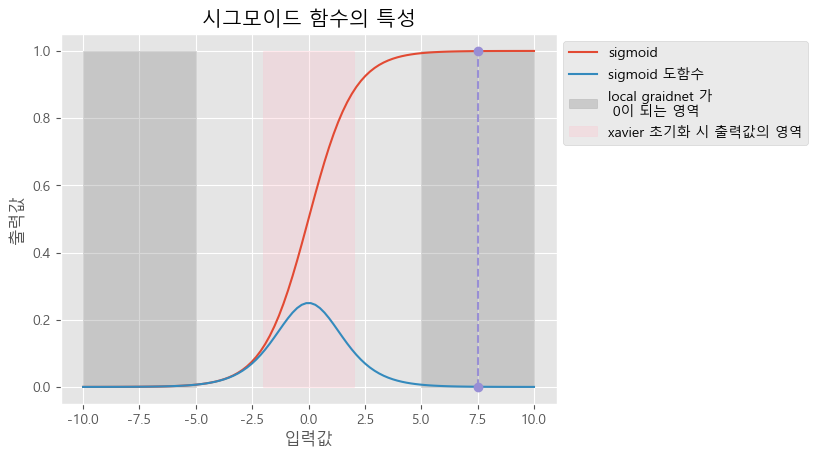

In [256]:
x = np.linspace(-10,10,100)

plt.plot(x,sigmoid(x), label = 'sigmoid')
plt.plot(x,sigmoid(x) * (1 - sigmoid(x)), label = 'sigmoid 도함수')
plt.fill_between([-10,-5],[1,1], alpha = 0.3, color = 'gray', label = 'local graidnet 가 \n 0이 되는 영역')
plt.fill_between([10,5],[1,1], alpha = 0.3, color = 'gray')
plt.fill_between([-2,2],[1,1], alpha = 0.3, color = 'pink', label = 'xavier 초기화 시 출력값의 영역')

plt.plot([7.5,7.5],[0,1], ls = '--', marker = 'o')
plt.xlabel('입력값')
plt.ylabel('출력값')

plt.legend(bbox_to_anchor = (1,1))
plt.title('시그모이드 함수의 특성')

* 이렇게 활성화 함수의 값이 극단적으로 치우쳐지지 않고 출력값들이 미분이 가능한 영역 안에 위치한다는 것은 이후 가중치 업데이트를 위한 역전파 과정에 있어 무리가 없음을 의미한다.
* 이는 Gradient Vanishing 문제를 해결해줄 수 있으며 Global minimum 을 찾는데 큰 도움이 되었다.

### 2. He 초기화 기법 

    He 초기화는 평균이 0이고 표준 편차 sqrt(2/n)가 있는 가우시안 분포에서 초기 가중치를 설정합니다. 여기서 n은 레이어에 대한 입력 수입니다. 이 기술은 Xavier 초기화에서 기울기 소실을 유발할 수 있는 ReLU와 같은 활성화 함수를 사용하는 네트워크에 특히 효과적입니다.

* Xavier 초기화 기법은 활성화 함수가 sigmoid 인 경우에 효과적이였으나 활성화 함수가 Relu 함수일 때는 효과적이지 못하다.
* 이는 Relu 함수의 특성과 관련되어 있다.

Text(0.5, 1.0, 'relu')

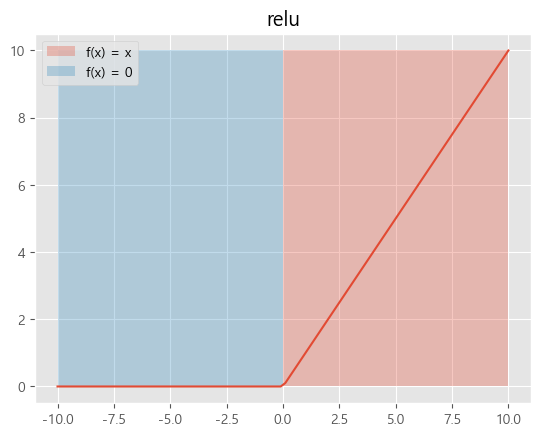

In [268]:
x = np.linspace(-10,10,100)

plt.plot(x,relu(x))
plt.fill_between([0,max(x)],[10,10],alpha = 0.3, label = 'f(x) = x')
plt.fill_between([-10,0],[10,10],alpha = 0.3, label = 'f(x) = 0')

plt.legend()
plt.title('relu')

* Xavier 초기화 기법을 사용하면서 activation 은 relu 함수로 사용해보자 

In [269]:
input_data = np.random.randn(1000,100) # 임의의 데이터 1000 * 100 행렬 생성 
node_num = 100 # 각 뉴런의 노드 갯수 
hidden_layer = 5

activation = {}
weights_01 = {}
input_dict = {}
x = input_data

for i in range(hidden_layer):
    
    if i != 0:
        x = activation[i-1] # 2 번째 hidden layer 부턴 전 activation 의 출력값을 input 으로 가져라 
        
    W = np.random.randn(node_num,node_num) * np.sqrt(1/node_num) # 100 * 100 행렬의 가중치 행렬 생성 
                                                # 이전 layer 의 node 갯수의 역수를 분산으로 사용한다.
    
    input_ = np.dot(x,W) # 가중합으로 해당 activation 에 입력
    
    
    weights_01[i] = W.flatten()
    input_dict[i] = input_
    activation[i] = relu(input_) # 활성화 함수로 감싼 다음 activaition 으로 출력

Text(0.5, 0.98, '활성화 함수가 relu 면서 가중치를 Xavier 초기화 기법으로 초기화 하였을 때 출력값들의 변화')

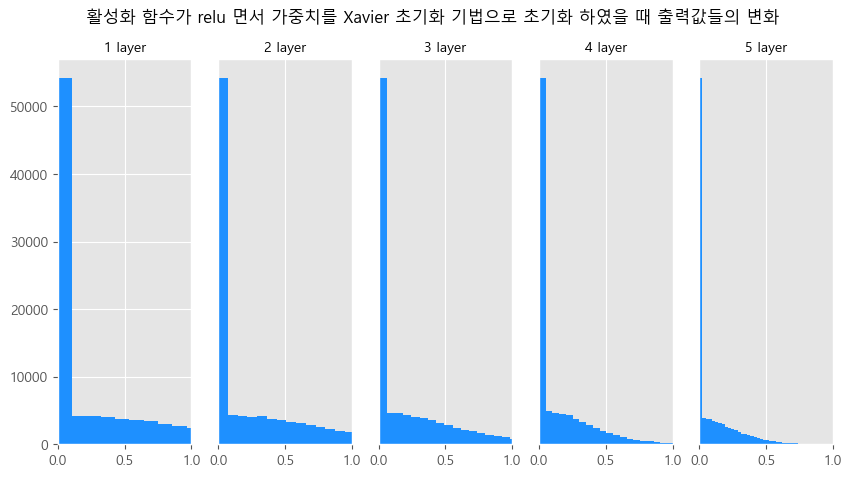

In [271]:
fig, ax = plt.subplots(ncols = len(activation),
                        figsize = (10,5))


ax = ax.flatten()

for i,var in activation.items():
    
    ax[i].hist(var.flatten(), bins = 50,color = 'dodgerblue')
    
    if i != 0:
        ax[i].set_yticks([])
    
    ax[i].set_xlim([0,1])    
    ax[i].set_title(f'{i + 1} layer', fontsize = 10)
    
fig.suptitle('활성화 함수가 relu 면서 가중치를 Xavier 초기화 기법으로 초기화 하였을 때 출력값들의 변화') 

* 초기화 기법을 Xavier를 사용했더니 죽은 relu 값 (출력값이 음수가 나와 활성화 함수를 적용하니 0의 값이 나오는)의 양상이 많이 보인다.

Text(0.5, 0.98, '활성화 함수가 relu 면서 Xavier 초기화 기법')

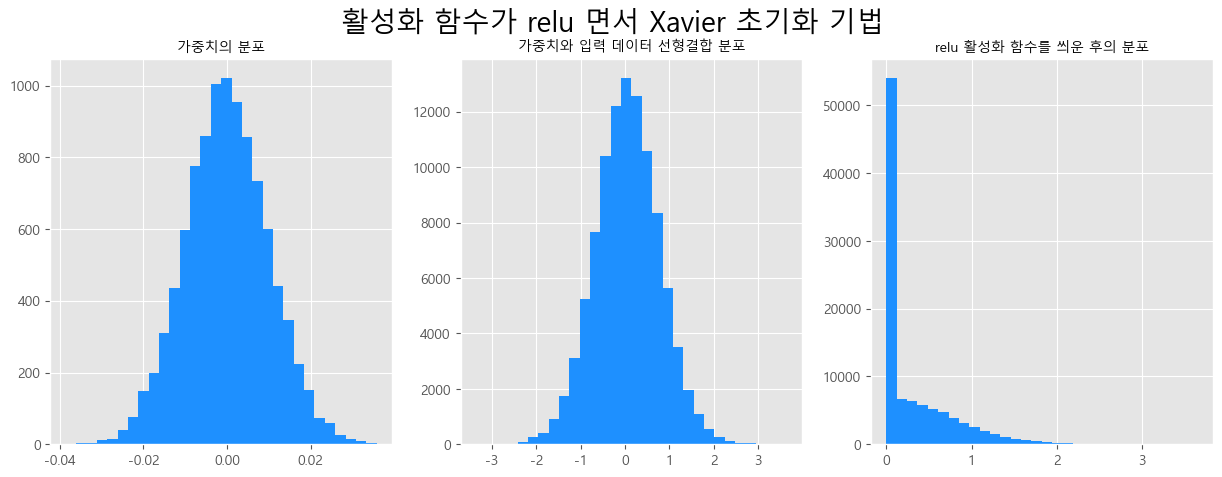

In [273]:
fig, ax = plt.subplots(ncols = 3, figsize =  (15,5))


ax[0].hist(weights_1[1].flatten(), bins = 30, color = 'dodgerblue')
ax[0].set_title('가중치의 분포', fontsize = 10)


ax[1].hist(input_dict[1].flatten(), bins = 30, color = 'dodgerblue')
ax[1].set_title('가중치와 입력 데이터 선형결합 분포', fontsize = 10)


ax[2].hist(activation[1].flatten(), bins = 30, color = 'dodgerblue')
ax[2].set_title('relu 활성화 함수를 씌운 후의 분포', fontsize = 10)

fig.suptitle('활성화 함수가 relu 면서 Xavier 초기화 기법',fontsize = 20)


    그러나 ReLU 활성화 함수의 경우는 약간 다릅니다. ReLU는 입력이 양수일 때만 기울기가 0이 아니므로 가중치가 너무 작게 초기화되면 네트워크는 출력이 0인 "죽은" 뉴런을 경험하여 학습 속도가 느려질 수 있습니다. 반면 가중치가 너무 크면 그래디언트가 너무 커서 그래디언트 폭발 문제가 발생할 수 있습니다.


    이를 해결하기 위해 Xavier 초기화에서 사용한 sqrt(1/n_in) 대신 가중치의 표준편차를 sqrt(2/n_in)으로 설정하는 He 초기화 기법을 제안하였다. 이 접근 방식은 가중치를 약간 더 포화 상태로 만들어서 ReLU 함수가 양수 값을 출력할 가능성이 높지만 포화 상태일 정도로 많지는 않습니다.

* 이에 Xavier 초기화 기법은 1 / sqrt(이전 node 의 갯수) 를 표준편차로 사용하였다면 He 초기화 기법은 2 / sqrt(이전 node 의 갯수) 를 사용한다.

In [285]:
input_data = np.random.randn(1000,100) # 임의의 데이터 1000 * 100 행렬 생성 
node_num = 100 # 각 뉴런의 노드 갯수 
hidden_layer = 5

activation = {}
weights_01 = {}
input_dict = {}
x = input_data

for i in range(hidden_layer):
    
    if i != 0:
        x = activation[i-1] # 2 번째 hidden layer 부턴 전 activation 의 출력값을 input 으로 가져라 
        
    W = np.random.randn(node_num,node_num) * np.sqrt(2/node_num) # 100 * 100 행렬의 가중치 행렬 생성 
                                                # 이전 layer 의 node 갯수의 역수를 분산으로 사용한다.
    
    input_ = np.dot(x,W) # 가중합으로 해당 activation 에 입력
    
    
    weights_01[i] = W.flatten()
    input_dict[i] = input_
    activation[i] = relu(input_) # 활성화 함수로 감싼 다음 activaition 으로 출력

Text(0.5, 0.98, '활성화 함수가 relu 면서 가중치를 He 초기화 기법으로 초기화 하였을 때 출력값들의 변화')

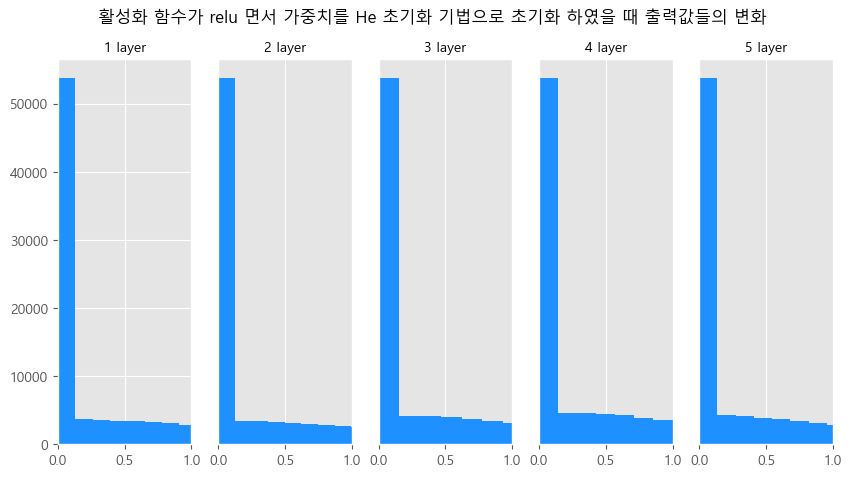

In [286]:
fig, ax = plt.subplots(ncols = len(activation),
                        figsize = (10,5))


ax = ax.flatten()

for i,var in activation.items():
    
    ax[i].hist(var.flatten(), bins = 50,color = 'dodgerblue')
    
    if i != 0:
        ax[i].set_yticks([])
    
    ax[i].set_xlim([0,1])    
    ax[i].set_title(f'{i + 1} layer', fontsize = 10)
    
fig.suptitle('활성화 함수가 relu 면서 가중치를 He 초기화 기법으로 초기화 하였을 때 출력값들의 변화') 

Text(0.5, 0.98, '활성화 함수가 relu 면서 He 초기화 기법')

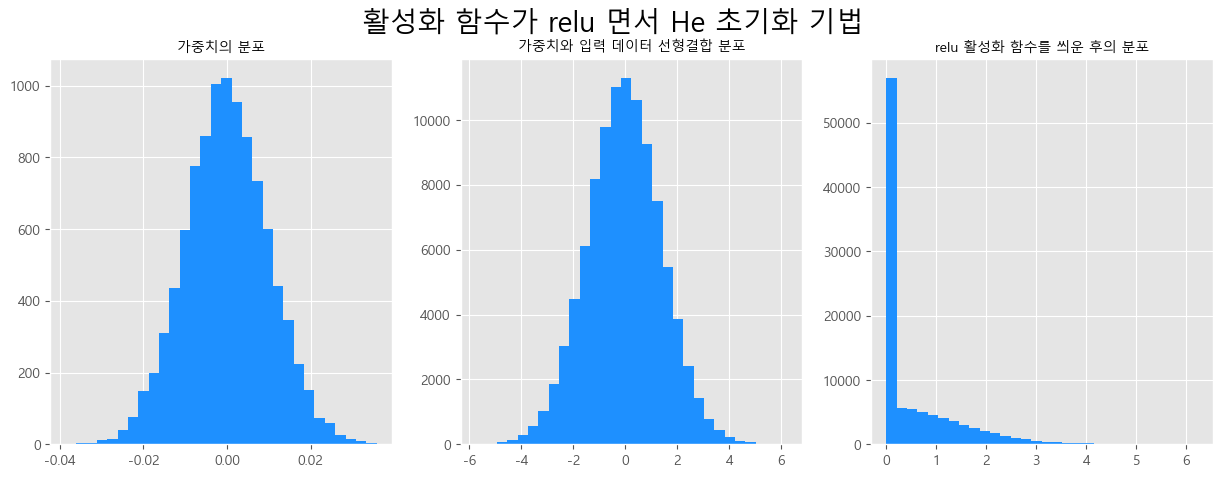

In [287]:
fig, ax = plt.subplots(ncols = 3, figsize =  (15,5))


ax[0].hist(weights_1[1].flatten(), bins = 30, color = 'dodgerblue')
ax[0].set_title('가중치의 분포', fontsize = 10)


ax[1].hist(input_dict[1].flatten(), bins = 30, color = 'dodgerblue')
ax[1].set_title('가중치와 입력 데이터 선형결합 분포', fontsize = 10)


ax[2].hist(activation[1].flatten(), bins = 30, color = 'dodgerblue')
ax[2].set_title('relu 활성화 함수를 씌운 후의 분포', fontsize = 10)

fig.suptitle('활성화 함수가 relu 면서 He 초기화 기법',fontsize = 20)

* 이전에 비해 죽은 relu 의 값들이 줄어든 것을 볼 수 있다.

* 만일 죽은 relu를 최소화 하고 싶다면 leaky relu 를 사용 할 수 있다.

In [288]:
def leaky_relu(x,alpha):
    return np.maximum(alpha*x, x)

Text(0.5, 1.0, 'Leaky relu')

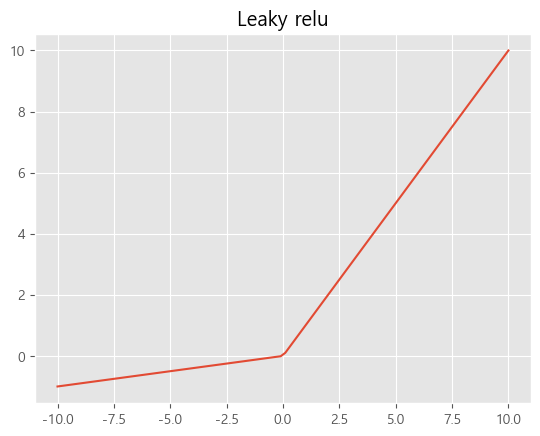

In [289]:
x = np.linspace(-10,10,100)

plt.plot(x,leaky_relu(x,0.1))
plt.title('Leaky relu')

In [290]:
input_data = np.random.randn(1000,100) # 임의의 데이터 1000 * 100 행렬 생성 
node_num = 100 # 각 뉴런의 노드 갯수 
hidden_layer = 5

activation = {}
weights_01 = {}
input_dict = {}
x = input_data

for i in range(hidden_layer):
    
    if i != 0:
        x = activation[i-1] # 2 번째 hidden layer 부턴 전 activation 의 출력값을 input 으로 가져라 
        
    W = np.random.randn(node_num,node_num) * np.sqrt(2/node_num) # 100 * 100 행렬의 가중치 행렬 생성 
                                                # 이전 layer 의 node 갯수의 역수를 분산으로 사용한다.
    
    input_ = np.dot(x,W) # 가중합으로 해당 activation 에 입력
    
    
    weights_01[i] = W.flatten()
    input_dict[i] = input_
    activation[i] = leaky_relu(input_,0.1) # 활성화 함수로 감싼 다음 activaition 으로 출력

Text(0.5, 0.98, '활성화 함수가 leaky_relu 면서 가중치를 Xavier 초기화 기법으로 초기화 하였을 때 출력값들의 변화')

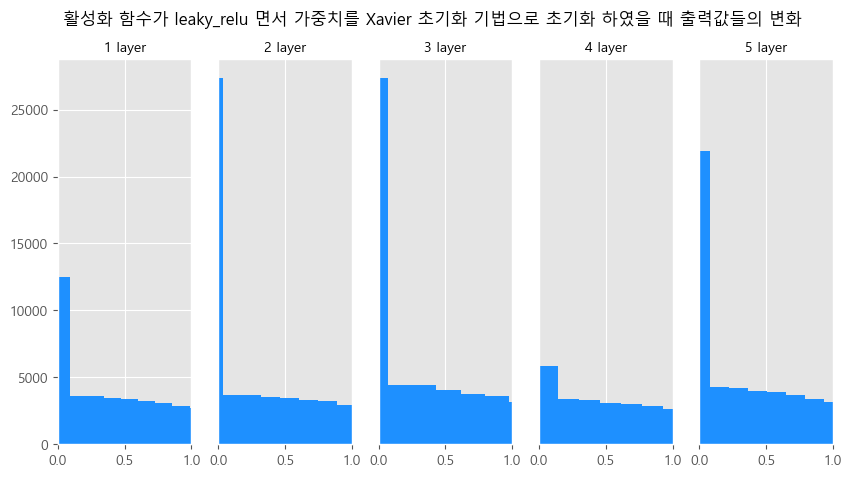

In [291]:
fig, ax = plt.subplots(ncols = len(activation),
                        figsize = (10,5))


ax = ax.flatten()

for i,var in activation.items():
    
    ax[i].hist(var.flatten(), bins = 50,color = 'dodgerblue')
    
    if i != 0:
        ax[i].set_yticks([])
    
    ax[i].set_xlim([0,1])    
    ax[i].set_title(f'{i + 1} layer', fontsize = 10)
    
fig.suptitle('활성화 함수가 leaky_relu 면서 가중치를 Xavier 초기화 기법으로 초기화 하였을 때 출력값들의 변화') 

Text(0.5, 0.98, '활성화 함수가 leaky_relu 면서 He 초기화 기법')

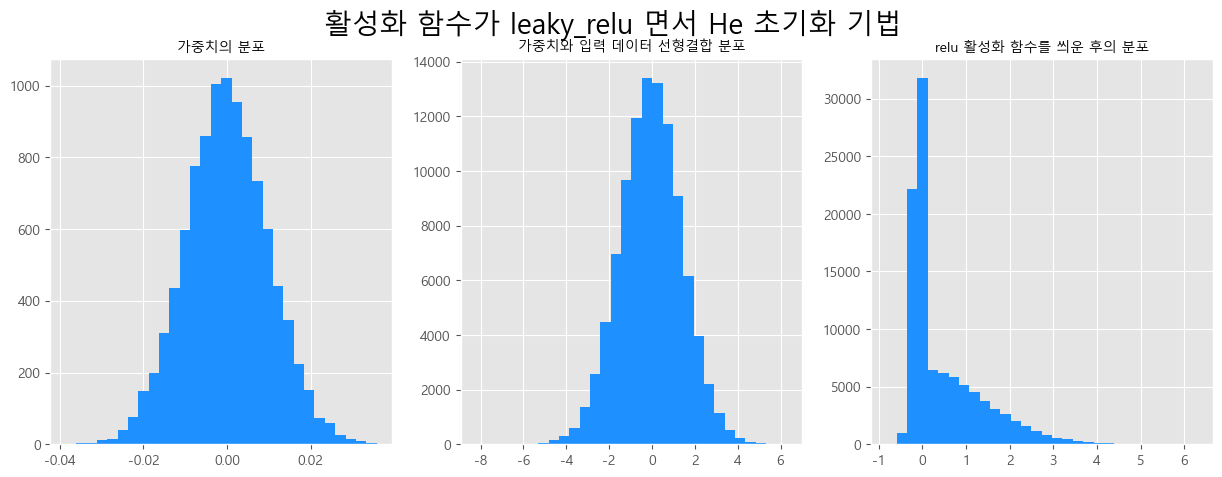

In [292]:
fig, ax = plt.subplots(ncols = 3, figsize =  (15,5))


ax[0].hist(weights_1[1].flatten(), bins = 30, color = 'dodgerblue')
ax[0].set_title('가중치의 분포', fontsize = 10)


ax[1].hist(input_dict[1].flatten(), bins = 30, color = 'dodgerblue')
ax[1].set_title('가중치와 입력 데이터 선형결합 분포', fontsize = 10)


ax[2].hist(activation[1].flatten(), bins = 30, color = 'dodgerblue')
ax[2].set_title('relu 활성화 함수를 씌운 후의 분포', fontsize = 10)

fig.suptitle('활성화 함수가 leaky_relu 면서 He 초기화 기법',fontsize = 20)